In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [78]:
df = pd.read_csv('netflix.csv')

In [79]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [80]:
df.shape

(8807, 12)

In [81]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [82]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [83]:
print('Types of ratings:',df['rating'].unique())

Types of ratings: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


In [84]:
print('Number of Movies:',
      df[df['type'] == 'Movie']['duration'].count(),
      '\nShow Durations:',
      df[df['type'] == 'Movie']['duration'].unique())

Number of Movies: 6128 
Show Durations: ['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '64 min' '59 min' '139 min' '69 min' '148 min' '189 min'
 '141 min' '130 min' '138 min' '81 min' '132 min' '123 min' '65 min'
 '68 min' '66 min' '62 min' '74 min' '131 min' '39 min' '46 min' '38 min'
 '126 min' '155 min' '159 min' '137 min' '12 min' '273 mi

In [85]:
print('Number of Shows:',
      df[df['type'] == 'TV Show']['duration'].count(),
      '\nShow Durations:',
      df[df['type'] == 'TV Show']['duration'].unique())

Number of Shows: 2676 
Show Durations: ['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']


<h4>Observations</h4>

<ul>
    <li>A lot of null values, especially for director, cast and country</li>
    <li>Rating isn't the popularity, but the suggested audience of a movie/film</li>
    <li>Listed In is essntially the genre list</li>
    <li>Duration is kept in two different metrics, time for movies and seasons for shows</li>
</ul>

# Preprocessing & Visualization

<h3>General</h3>

Dropping Director, Cast, and Country, due to the amoung of null values and how unlikely it is that they will have a significant effect on future models

In [86]:
df = df.drop(['director', 'cast', 'country'], axis=1)

Dropping duration column, as two different metrics are used depending on whether the item is a show or a movie. Another solution would be to split the dataset into movies and shows, but we want to be able to recommend either.

In [87]:
df = df.drop('duration', axis=1)

Dropping date added, since it has little relevance

In [88]:
df = df.drop('date_added', axis=1)

In [89]:
df.isnull().sum()

show_id         0
type            0
title           0
release_year    0
rating          4
listed_in       0
description     0
dtype: int64

Renaming two-word column names for ease

In [90]:
df = df.rename({'release_year':'year'}, axis=1)
df = df.rename({'listed_in':'category'}, axis=1)
df = df.rename({'show_id':'id'}, axis=1)

In [91]:
df[df['rating'].isnull()].head()

,id,type,title,year,rating,category,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,2017,NaN,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,2013,NaN,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,2015,NaN,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,2015,NaN,Dramas,"Amid the chaos and horror of World War II, a c..."


Looking at the remaining null values, which is the four null ratings, it is low enough that we can drop those in order to simplify the computations being done

In [92]:
df = df.dropna()

In [93]:
df.shape

(8803, 7)

<h3>RS Processing</h3>

One hot encoding the comma seperated list of genres, preparing dataframe for recommendation system

In [94]:
df_genres = df.copy()
df_genres['category'] = df_genres['category'].str.replace(' ', '')
df_enc = df_genres.join(pd.concat([df_genres['category'].str.get_dummies(sep=',')])).drop('category',axis=1)

In [95]:
pd.set_option('display.max_columns', None)
df_enc

,id,type,title,year,rating,description,Action&Adventure,AnimeFeatures,AnimeSeries,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,"As her father nears the end of his life, filmm...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,2021,TV-MA,To protect his family from a powerful drug lor...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,2021,TV-MA,In a city of coaching centers known to train I...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,2007,R,"A political cartoonist, a crime reporter and a...",0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8803,s8804,TV Show,Zombie Dumb,2018,TV-Y7,"While living alone in a spooky town, a young g...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8804,s8805,Movie,Zombieland,2009,R,Looking to survive in a world taken over by zo...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8805,s8806,Movie,Zoom,2006,PG,"Dragged from civilian life, a former superhero...",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h4>Renaming columns</h4>

Noticing a lot of redundancy between categories, especially to split movies and shows. I am going to essentially merge the two

In [96]:
def getFirstRow(df,feature):
    return df[df[feature] == 1].head(1)

In [97]:
def getRow(df,id):
    return df.loc[df_enc['id'] == id]

In [98]:
df_enc.columns

Index(['id', 'type', 'title', 'year', 'rating', 'description',
       'Action&Adventure', 'AnimeFeatures', 'AnimeSeries', 'BritishTVShows',
       'Children&FamilyMovies', 'Classic&CultTV', 'ClassicMovies', 'Comedies',
       'CrimeTVShows', 'CultMovies', 'Documentaries', 'Docuseries', 'Dramas',
       'Faith&Spirituality', 'HorrorMovies', 'IndependentMovies',
       'InternationalMovies', 'InternationalTVShows', 'Kids'TV',
       'KoreanTVShows', 'LGBTQMovies', 'Movies', 'Music&Musicals', 'RealityTV',
       'RomanticMovies', 'RomanticTVShows', 'Sci-Fi&Fantasy',
       'Science&NatureTV', 'Spanish-LanguageTVShows', 'SportsMovies',
       'Stand-UpComedy', 'Stand-UpComedy&TalkShows', 'TVAction&Adventure',
       'TVComedies', 'TVDramas', 'TVHorror', 'TVMysteries', 'TVSci-Fi&Fantasy',
       'TVShows', 'TVThrillers', 'TeenTVShows', 'Thrillers'],
      dtype='object')

<h5>Anime</h5>

In [99]:
getFirstRow(df_enc,'AnimeFeatures')

,id,type,title,year,rating,description,Action&Adventure,AnimeFeatures,AnimeSeries,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,2002,TV-14,"With their biggest foe seemingly defeated, Inu...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
df_enc = df_enc.rename({'AnimeFeatures':'Anime'}, axis=1)
df_enc.loc[df_enc['AnimeSeries'] == 1, 'Anime'] = 1
df_enc = df_enc.drop('AnimeSeries', axis=1)

In [101]:
getRow(df_enc,'s77')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
76,s77,TV Show,Yowamushi Pedal,2013,TV-14,"A timid, anime-loving teen gets drawn into a s...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Classical and Cult</h5>

In [102]:
getFirstRow(df_enc,'Classic&CultTV')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic&CultTV,ClassicMovies,Comedies,CrimeTVShows,CultMovies,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
390,s391,TV Show,The Walking Dead,2019,TV-MA,"In the wake of a zombie apocalypse, survivors ...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [103]:
# Spilling Classic and Cult into two, assigning Classic&Cult to both, then comboning classicTV and classicMovies
df_enc = df_enc.rename({'Classic&CultTV':'Classic'}, axis=1)

df_enc = df_enc.rename({'CultMovies':'Cult'}, axis=1)
df_enc.loc[df_enc['Classic'] == 1, 'Cult'] = 1

df_enc.loc[df_enc['ClassicMovies'] == 1, 'Classic'] = 1
df_enc = df_enc.drop('ClassicMovies', axis=1)

In [104]:
getRow(df_enc,'s391')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
390,s391,TV Show,The Walking Dead,2019,TV-MA,"In the wake of a zombie apocalypse, survivors ...",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


<h5>Documentaries</h5>

In [105]:
getFirstRow(df_enc,'Docuseries')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Docuseries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
3,s4,TV Show,Jailbirds New Orleans,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
df_enc.loc[df_enc['Docuseries'] == 1, 'Documentaries'] = 1
df_enc = df_enc.drop('Docuseries', axis=1)

In [107]:
getRow(df_enc,'s4')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
3,s4,TV Show,Jailbirds New Orleans,2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Family/Kids</h5>

In [108]:
getFirstRow(df_enc,'Children&FamilyMovies')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Children&FamilyMovies,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids'TV,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
6,s7,Movie,My Little Pony: A New Generation,2021,PG,Equestria's divided. But a bright-eyed hero be...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
# Essentially, splitting Family and Children/Kids categories and adding Children&Family to both
df_enc = df_enc.rename({'Children&FamilyMovies':'Family'}, axis=1)
df_enc = df_enc.rename({"Kids'TV":'Kids'}, axis=1)

df_enc.loc[df_enc['Family'] == 1, 'Kids'] = 1

In [110]:
getRow(df_enc,'s7')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
6,s7,Movie,My Little Pony: A New Generation,2021,PG,Equestria's divided. But a bright-eyed hero be...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>International</h5>

In [111]:
getFirstRow(df_enc,'InternationalMovies')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,InternationalMovies,InternationalTVShows,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
7,s8,Movie,Sankofa,1993,TV-MA,"On a photo shoot in Ghana, an American model s...",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df_enc = df_enc.rename({'InternationalMovies':'International'}, axis=1)
df_enc.loc[df_enc['InternationalTVShows'] == 1, 'International'] = 1
df_enc = df_enc.drop('InternationalTVShows', axis=1)

In [113]:
getRow(df_enc,'s8')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
7,s8,Movie,Sankofa,1993,TV-MA,"On a photo shoot in Ghana, an American model s...",0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h5>Comedy And Talk Shows</h5>

In [114]:
getFirstRow(df_enc,'Stand-UpComedy')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedies,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,Stand-UpComedy,Stand-UpComedy&TalkShows,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
278,s279,Movie,Lokillo: Nothing's the Same,2021,TV-MA,"Through songs and puns, comedian Lokillo Flore...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [115]:
# Puts stand-up comedy into talk shows and comedies before dropping the column
df_enc = df_enc.rename({'Comedies':'Comedy'}, axis=1)

df_enc = df_enc.rename({'Stand-UpComedy&TalkShows':'TalkShow'}, axis=1)
df_enc.loc[df_enc['Stand-UpComedy'] == 1, 'TalkShow'] = 1

df_enc.loc[df_enc['Stand-UpComedy'] == 1, 'Comedy'] = 1
df_enc = df_enc.drop('Stand-UpComedy', axis=1)

In [116]:
getRow(df_enc,'s279')

,id,type,title,year,rating,description,Action&Adventure,Anime,BritishTVShows,Family,Classic,Comedy,CrimeTVShows,Cult,Documentaries,Dramas,Faith&Spirituality,HorrorMovies,IndependentMovies,International,Kids,KoreanTVShows,LGBTQMovies,Movies,Music&Musicals,RealityTV,RomanticMovies,RomanticTVShows,Sci-Fi&Fantasy,Science&NatureTV,Spanish-LanguageTVShows,SportsMovies,TalkShow,TVAction&Adventure,TVComedies,TVDramas,TVHorror,TVMysteries,TVSci-Fi&Fantasy,TVShows,TVThrillers,TeenTVShows,Thrillers
278,s279,Movie,Lokillo: Nothing's the Same,2021,TV-MA,"Through songs and puns, comedian Lokillo Flore...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<h5>Misc. Renaming</h5>

In [117]:
df_enc = df_enc.rename({'BritishTVShows':'British'}, axis=1)
df_enc = df_enc.rename({'CrimeTVShows':'Crime'}, axis=1)
df_enc = df_enc.rename({'Faith&Spirituality':'Faith'}, axis=1)
df_enc = df_enc.rename({'IndependentMovies':'Independant'}, axis=1)
df_enc = df_enc.rename({'KoreanTVShows':'Korean'}, axis=1)
df_enc = df_enc.rename({'LGBTQMovies':'LGBTQ'}, axis=1)
df_enc = df_enc.rename({'Music&Musicals':'Musical'}, axis=1)
df_enc = df_enc.rename({'RealityTV':'Reality'}, axis=1)
df_enc = df_enc.rename({'Science&NatureTV':'Science'}, axis=1)
df_enc = df_enc.rename({'Spanish-LanguageTVShows':'Spanish'}, axis=1)
df_enc = df_enc.rename({'SportsMovies':'Sports'}, axis=1)
df_enc = df_enc.rename({'TVMysteries':'Mystery'}, axis=1)
df_enc = df_enc.rename({'TeenTVShows':'Teen'}, axis=1)

In [118]:
df_enc = df_enc.drop('Movies', axis=1)
df_enc = df_enc.drop('TVShows', axis=1)

In [119]:
df_enc.loc[df_enc['TVDramas'] == 1, 'Dramas'] = 1
df_enc = df_enc.drop('TVDramas', axis=1)

In [120]:
df_enc = df_enc.rename({'Action&Adventure':'Action'}, axis=1)
df_enc.loc[df_enc['TVAction&Adventure'] == 1, 'Action'] = 1
df_enc = df_enc.drop('TVAction&Adventure', axis=1)

In [121]:
df_enc = df_enc.rename({'RomanticMovies':'Romance'}, axis=1)
df_enc.loc[df_enc['RomanticTVShows'] == 1, 'Romance'] = 1
df_enc = df_enc.drop('RomanticTVShows', axis=1)

In [122]:
df_enc = df_enc.rename({'HorrorMovies':'Horror'}, axis=1)
df_enc.loc[df_enc['TVHorror'] == 1, 'Horror'] = 1
df_enc = df_enc.drop('TVHorror', axis=1)

In [123]:
df_enc = df_enc.rename({'Sci-Fi&Fantasy':'SciFiFan'}, axis=1)
df_enc.loc[df_enc['TVSci-Fi&Fantasy'] == 1, 'SciFiFan'] = 1
df_enc = df_enc.drop('TVSci-Fi&Fantasy', axis=1)

In [124]:
df_enc.loc[df_enc['TVThrillers'] == 1, 'Thrillers'] = 1
df_enc = df_enc.drop('TVThrillers', axis=1)

<h3>Visualizations</h3>

In [125]:
df_genres = df_enc.drop(['id', 'type', 'title', 'year', 'rating', 'description'], axis=1)

In [126]:
genre_ratios = df_genres.sum().sort_values(ascending=False)
genre_ratios

International    4102
Dramas           3189
Comedy           2017
Documentaries    1264
Kids             1091
Action           1027
Romance           986
Independant       756
Family            641
Thrillers         634
TVComedies        580
Crime             470
Horror            432
TalkShow          399
Musical           375
SciFiFan          327
Reality           255
British           253
Anime             246
Sports            219
Spanish           174
Korean            151
Classic           144
LGBTQ             102
Cult               99
Mystery            98
Science            92
Teen               69
Faith              65
dtype: int64

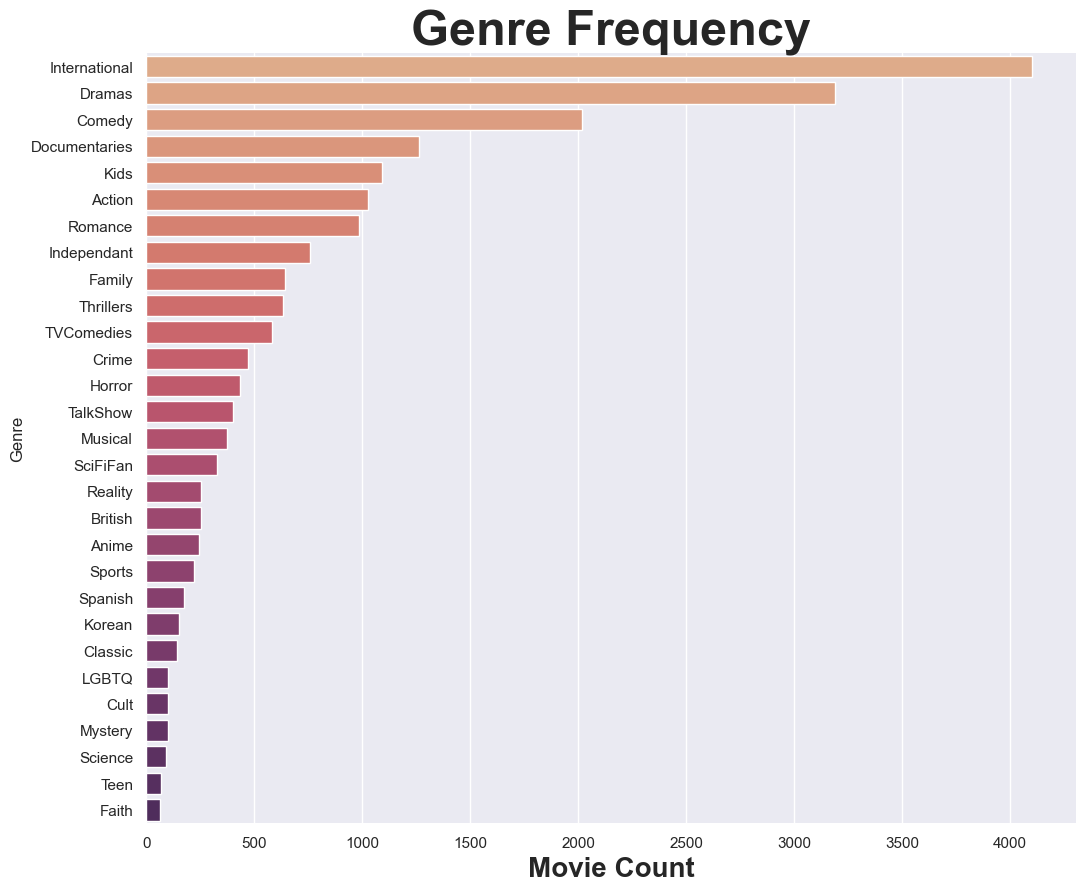

In [127]:
# Turning the series into a dataframe for the sake of the the next graph
df_genre_ratios = pd.DataFrame({'Genre':genre_ratios.index, 'Movie Count':genre_ratios.values}).sort_values("Movie Count", ascending=False)

# Plotting the number of each genre of movie
sns.set_theme(context="talk",style="dark")
plt.figure(figsize=(12, 10))

sns.set_theme(style="darkgrid")
fig = sns.barplot(data=df_genre_ratios,x='Movie Count',y='Genre',hue='Genre',palette="flare")
sns.despine(left=True, bottom=True)

plt.title('Genre Frequency',fontdict={'size':35,'weight':'bold'})

fig.xaxis.label.set_fontweight('bold')
fig.xaxis.label.set_fontsize(20)

plt.show()

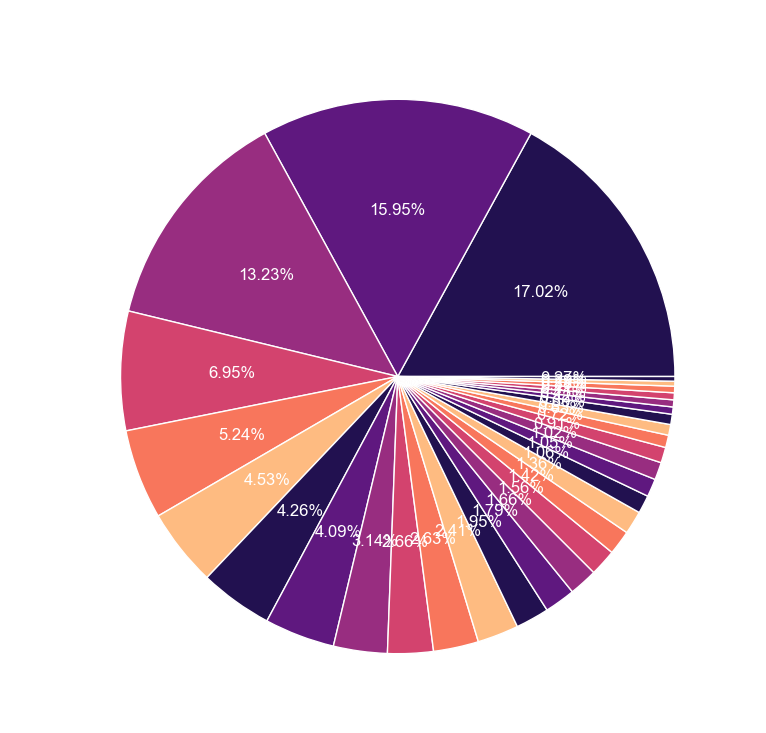

In [128]:
plt.figure(figsize=(9,9))
plt.rcParams['text.color'] = 'w'

plt.pie(genre_ratios_reduced,
        labels=genre_ratios_reduced.index,
        colors=sns.color_palette('magma'),
        autopct='%.2f%%')
plt.title('Genre Frequency')

plt.show()

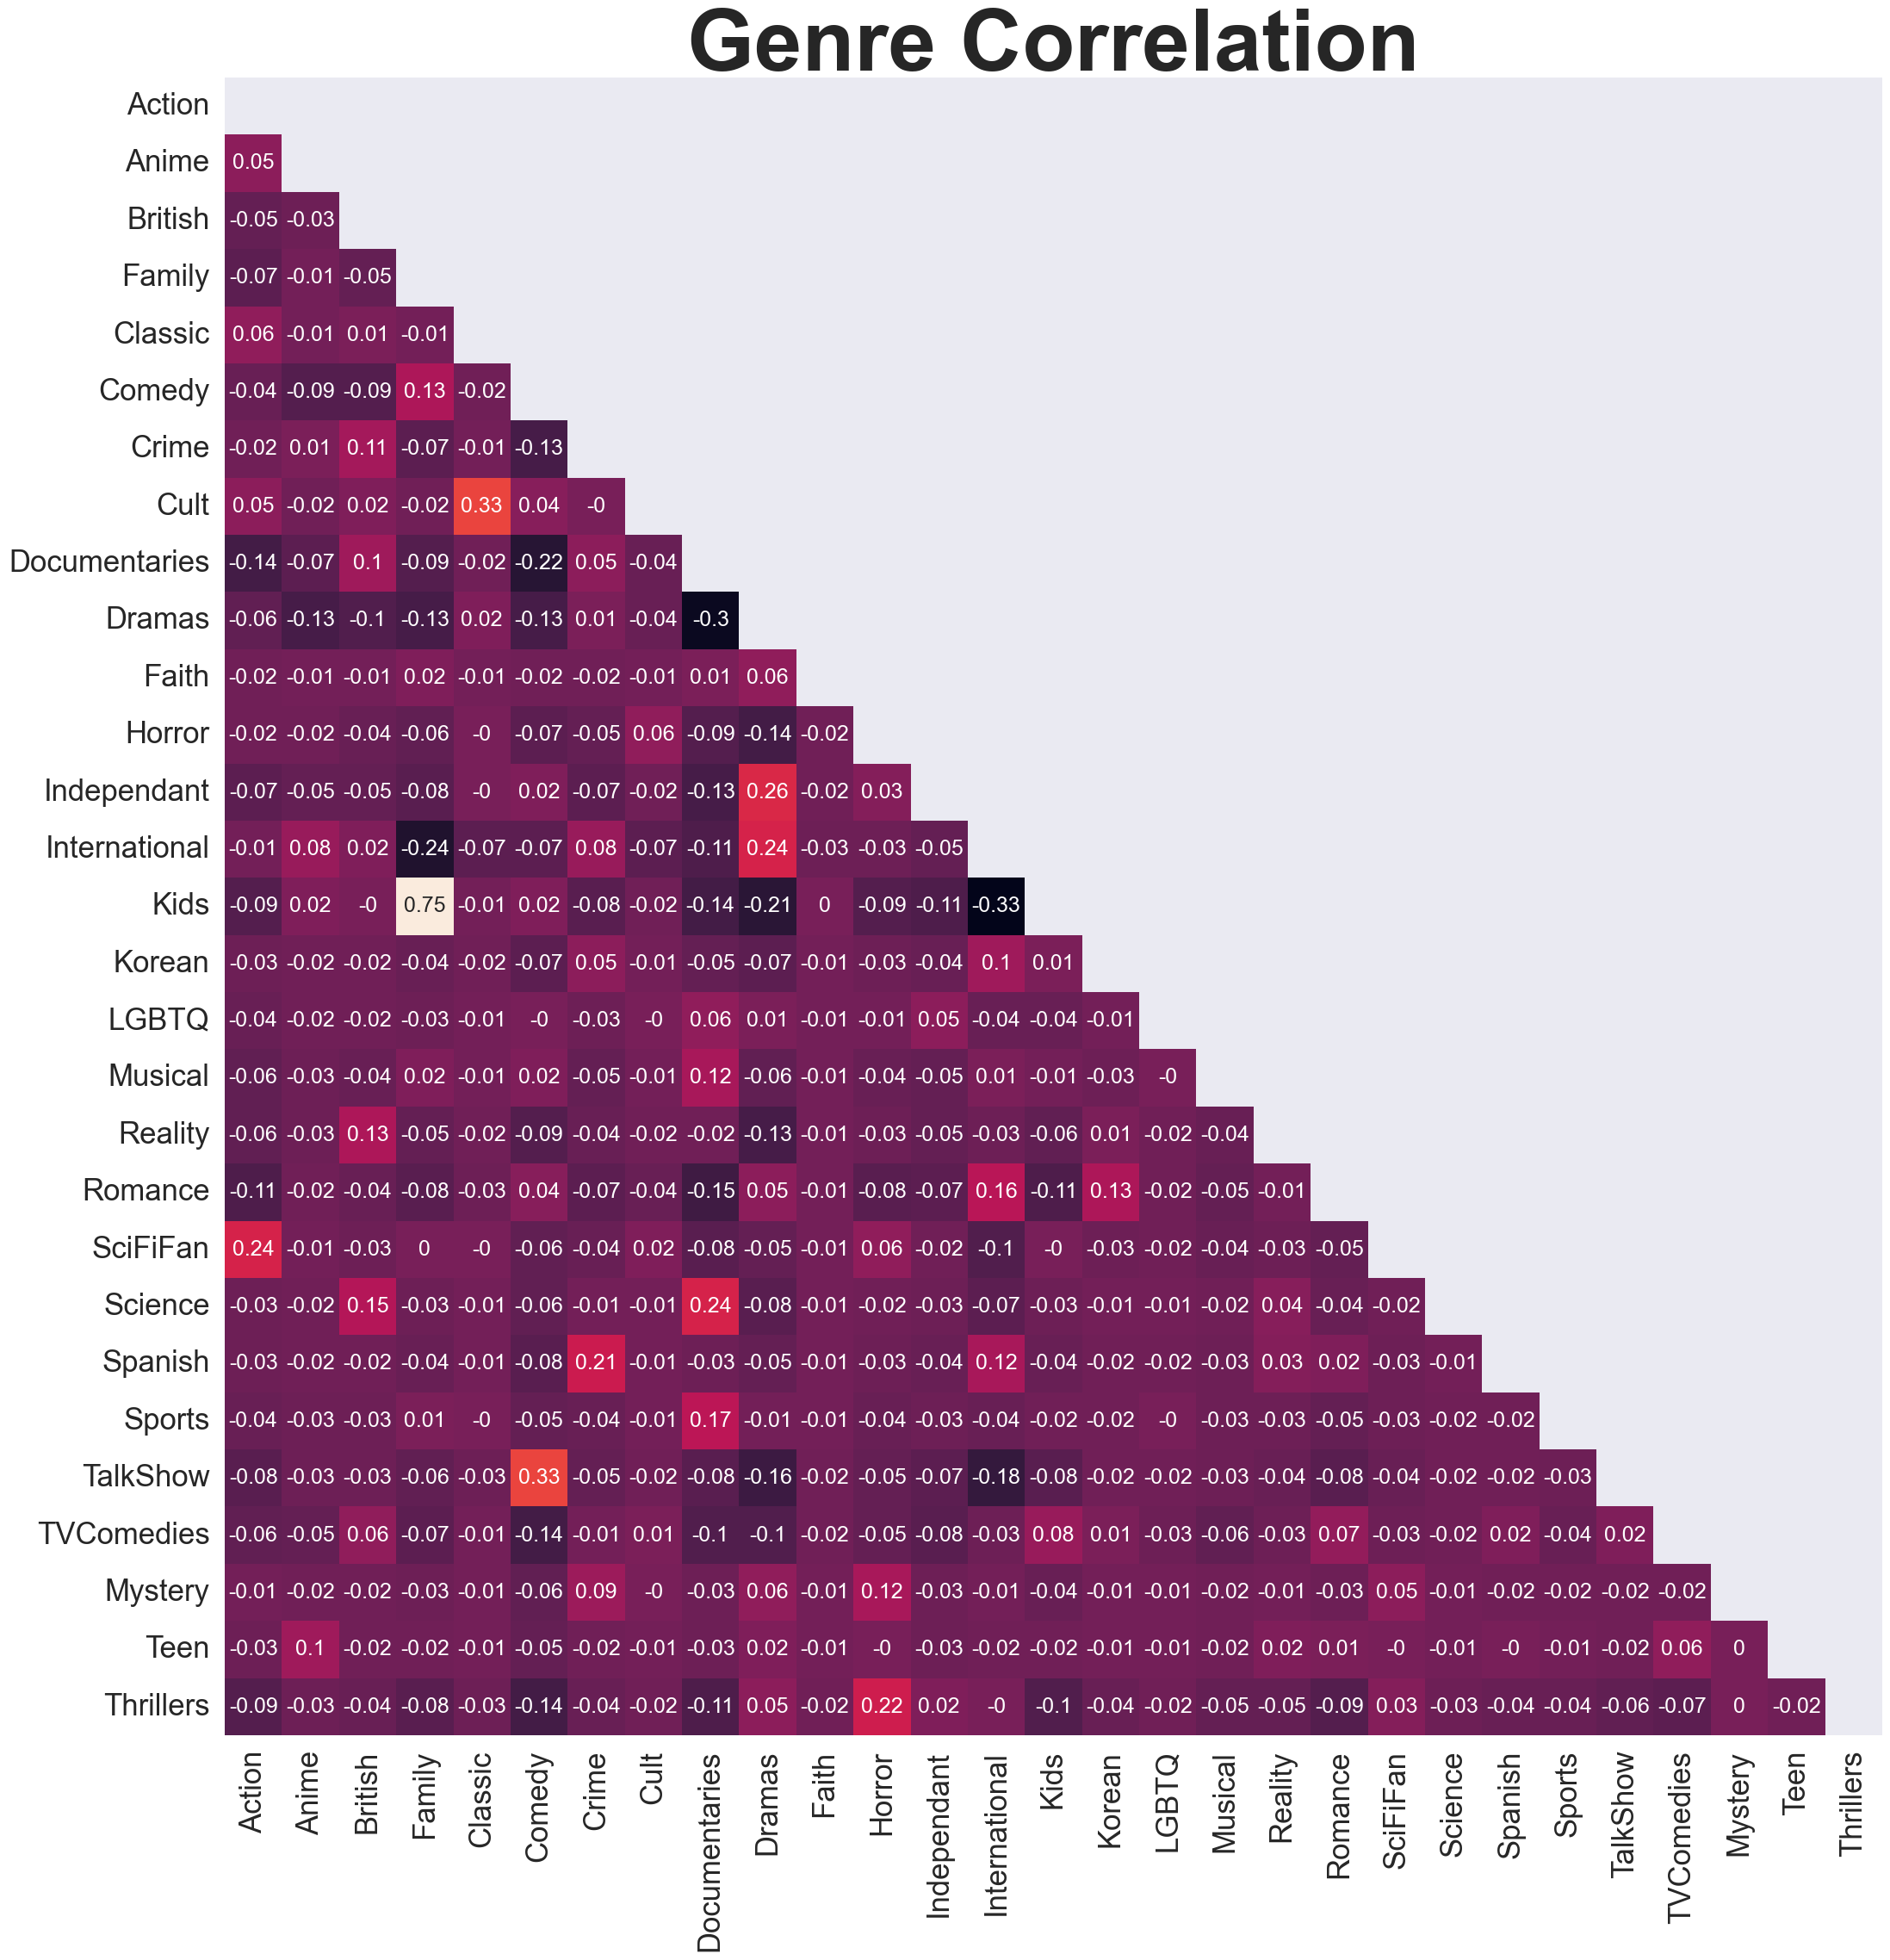

In [129]:
matrix = df_genres.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.set(rc={'figure.figsize':(25,25)})
sns.set_theme(context="talk",style="dark")

fig = sns.heatmap(matrix, annot=True, cbar=False, square=True, mask=mask)

fig.set_title('Genre Correlation',fontdict={'size':72,'weight':'bold'})
plt.rcParams['font.size'] = 10
fig.tick_params(axis='x',labelsize=25)
fig.tick_params(axis='y',labelsize=25)

plt.show()

# Modeling